<a href="https://colab.research.google.com/github/padolekrushna/ML_exercise.pynb/blob/main/Pandas_in_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###pandas for machine learning. The code includes an introduction to pandas, handling data (reading CSV, JSON), cleaning data, analyzing data (correlations), and plotting data.

In [5]:
# Importing pandas and matplotlib only
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pandas Intro and Getting Started
print("Pandas version:", pd.__version__)

# 2. Series - Creating a Pandas Series
series_example = pd.Series([10, 20, 30, 40, 50], index=["A", "B", "C", "D", "E"])
print("Pandas Series:\n", series_example)

# 3. DataFrame - Creating a Pandas DataFrame
data = {
    "Name": ["John", "Anna", "Peter", "Linda"],
    "Age": [28, 24, 35, 32],
    "City": ["New York", "Paris", "Berlin", "London"]
}
df = pd.DataFrame(data)
print("\nPandas DataFrame:\n", df)

# 4. Read CSV File (Note: File path needs to be adjusted)
# df_csv = pd.read_csv('your_file.csv')
# print("\nDataFrame from CSV:\n", df_csv)

# 5. Read JSON File (Note: File path needs to be adjusted)
# df_json = pd.read_json('your_file.json')
# print("\nDataFrame from JSON:\n", df_json)

Pandas version: 2.2.2
Pandas Series:
 A    10
B    20
C    30
D    40
E    50
dtype: int64

Pandas DataFrame:
     Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London


In [6]:
# 6. Analyzing Data
print("\nDataFrame Description:\n", df.describe())

# Cleaning Data
# 7. Cleaning Empty Cells - Filling empty cells
df_with_na = df.copy()
df_with_na.loc[2, "Age"] = None  # Using None to simulate missing data
print("\nBefore cleaning (with missing data):\n", df_with_na)
df_with_na["Age"].fillna(df_with_na["Age"].mean(), inplace=True)  # Filling missing values with mean
print("\nAfter filling missing values:\n", df_with_na)

# 8. Cleaning Wrong Format - Example of converting the data type
df["Age"] = df["Age"].astype(float)
print("\nData types after conversion:\n", df.dtypes)

# 9. Cleaning Wrong Data - Replacing wrong data
df.loc[1, "Age"] = -99  # Adding incorrect age
print("\nBefore cleaning wrong data:\n", df)
df.loc[df["Age"] < 0, "Age"] = df["Age"].mean()  # Replacing wrong data with mean
print("\nAfter cleaning wrong data:\n", df)

# 10. Removing Duplicates
df_with_duplicates = pd.concat([df, df.iloc[2:3]], ignore_index=True)
print("\nBefore removing duplicates:\n", df_with_duplicates)
df_no_duplicates = df_with_duplicates.drop_duplicates()
print("\nAfter removing duplicates:\n", df_no_duplicates)


DataFrame Description:
              Age
count   4.000000
mean   29.750000
std     4.787136
min    24.000000
25%    27.000000
50%    30.000000
75%    32.750000
max    35.000000

Before cleaning (with missing data):
     Name   Age      City
0   John  28.0  New York
1   Anna  24.0     Paris
2  Peter   NaN    Berlin
3  Linda  32.0    London

After filling missing values:
     Name   Age      City
0   John  28.0  New York
1   Anna  24.0     Paris
2  Peter  28.0    Berlin
3  Linda  32.0    London

Data types after conversion:
 Name     object
Age     float64
City     object
dtype: object

Before cleaning wrong data:
     Name   Age      City
0   John  28.0  New York
1   Anna -99.0     Paris
2  Peter  35.0    Berlin
3  Linda  32.0    London

After cleaning wrong data:
     Name   Age      City
0   John  28.0  New York
1   Anna  -1.0     Paris
2  Peter  35.0    Berlin
3  Linda  32.0    London

Before removing duplicates:
     Name   Age      City
0   John  28.0  New York
1   Anna  -1.0     

<ipython-input-6-ab92c7163424>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_na["Age"].fillna(df_with_na["Age"].mean(), inplace=True)  # Filling missing values with mean



Correlation Matrix:
           A         B         C
A  1.000000 -0.708683  1.000000
B -0.708683  1.000000 -0.708683
C  1.000000 -0.708683  1.000000


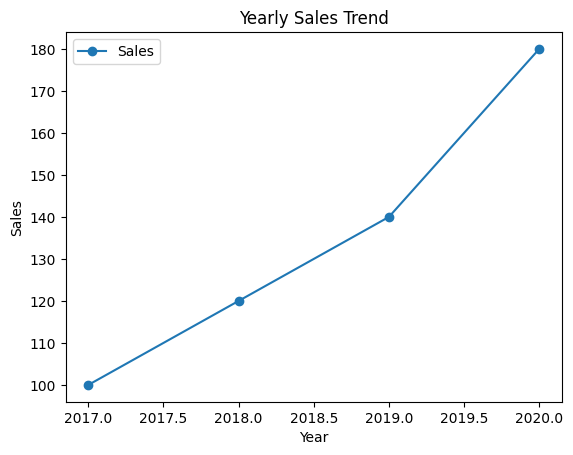

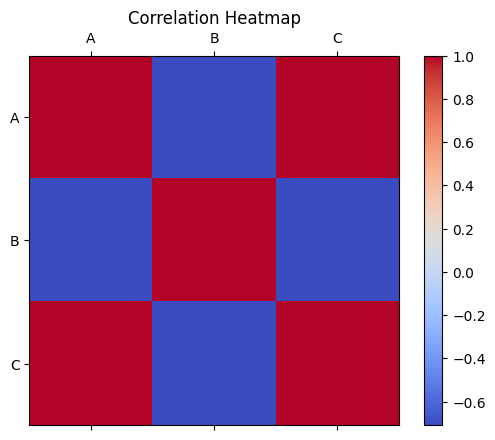


DataFrame with dates:
         Date  Value
0 2023-01-01    100
1 2023-01-02    200
2 2023-01-03    150
3 2023-01-04    300
4 2023-01-05    250

Year extracted from dates:
         Date  Value  Year
0 2023-01-01    100  2023
1 2023-01-02    200  2023
2 2023-01-03    150  2023
3 2023-01-04    300  2023
4 2023-01-05    250  2023

Merged DataFrame (Left Join):
    ID   Name      City
0   1   John  New York
1   2   Anna     Paris
2   3  Peter       NaN

Grouped data by City (average age):
            Age
City          
Berlin    35.0
London    32.0
New York  28.0
Paris     -1.0

After removing outliers:
    Value
0     10
1    200
2     30
4     50


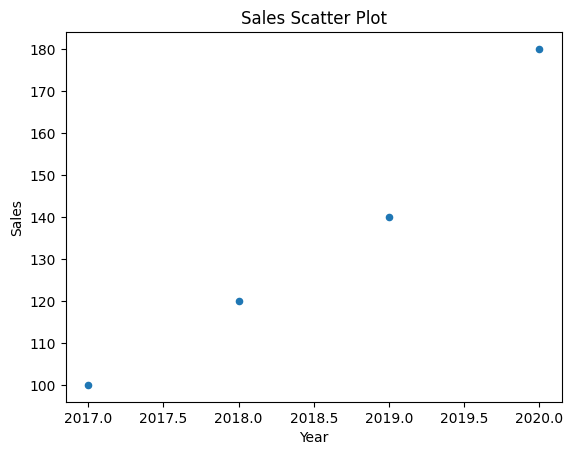

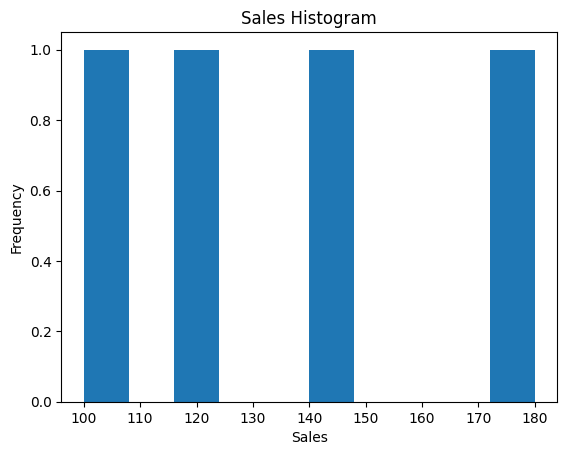

In [7]:
# 11. Correlation
# Example DataFrame for correlation calculation
df_corr = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 9, 2, 6, 4],
    'C': [2, 3, 4, 5, 6]
})
print("\nCorrelation Matrix:\n", df_corr.corr())

# 12. Plotting
# Example of plotting data using Pandas and Matplotlib
df_plot = pd.DataFrame({
    'Year': [2017, 2018, 2019, 2020],
    'Sales': [100, 120, 140, 180]
})

# Line Plot
df_plot.plot(x='Year', y='Sales', kind='line', marker='o', title="Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sales Trend")
plt.show()

# 13. Plotting Correlation Matrix as a heatmap using Matplotlib (without seaborn)
fig, ax = plt.subplots()
cax = ax.matshow(df_corr.corr(), cmap='coolwarm')  # Creating a heatmap
fig.colorbar(cax)

# Setting ticks and labels
ax.set_xticks(range(len(df_corr.columns)))
ax.set_yticks(range(len(df_corr.columns)))
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.title('Correlation Heatmap')
plt.show()

# Additional Topics to Cover

# 14. Handling Dates in DataFrames
df_dates = pd.DataFrame({
    "Date": pd.date_range("2023-01-01", periods=5, freq="D"),
    "Value": [100, 200, 150, 300, 250]
})
print("\nDataFrame with dates:\n", df_dates)
df_dates['Year'] = df_dates['Date'].dt.year  # Extracting year
print("\nYear extracted from dates:\n", df_dates)

# 15. Merging and Joining DataFrames
df_left = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['John', 'Anna', 'Peter']})
df_right = pd.DataFrame({'ID': [1, 2, 4], 'City': ['New York', 'Paris', 'Berlin']})
df_merged = pd.merge(df_left, df_right, on='ID', how='left')  # Left join example
print("\nMerged DataFrame (Left Join):\n", df_merged)

# 16. Grouping and Aggregation
grouped = df.groupby("City").agg({"Age": "mean"})
print("\nGrouped data by City (average age):\n", grouped)

# 17. Handling Large DataFrames (Reading in chunks)
# chunk_iter = pd.read_csv('large_file.csv', chunksize=1000)
# for chunk in chunk_iter:
#     print(chunk.head())

# 18. Advanced Data Cleaning (Removing Outliers)
df_outliers = pd.DataFrame({
    "Value": [10, 200, 30, 400, 50]
})
df_cleaned = df_outliers[(df_outliers["Value"] < 300)]  # Removing outliers
print("\nAfter removing outliers:\n", df_cleaned)

# 19. Advanced Plotting (Scatter Plot, Histogram)
# Scatter plot
df_plot.plot(kind='scatter', x='Year', y='Sales', title="Sales Scatter Plot")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales Scatter Plot")
plt.show()

# Histogram
df_plot['Sales'].plot(kind='hist', title="Sales Histogram")
plt.xlabel("Sales")
plt.title("Sales Histogram")
plt.show()